# 1.1.1 Пример
Задача:

Проведем прямую 𝑦 = 𝑚𝑥 + 𝑏 через экспериментальные точки.
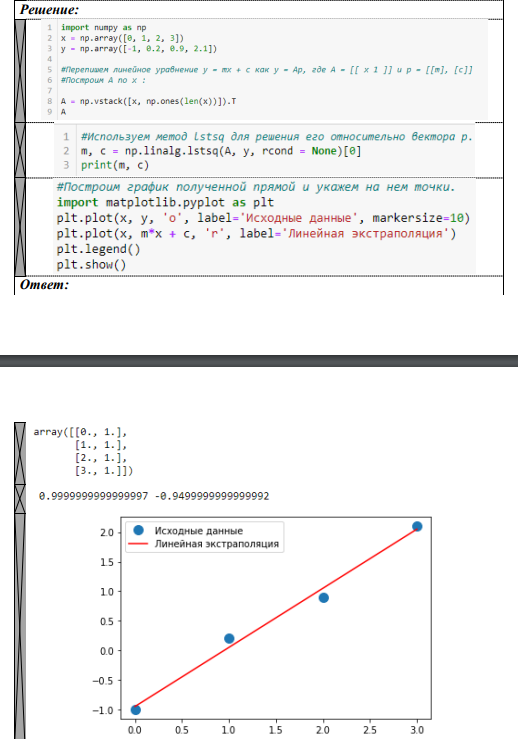

# 1.1.2 Пример

Задача:

Пусть 𝑥, 𝑦 – вектора длиной 𝑛 > 3 (точек > 3). Задача заключается в
построении эстраполяционного полинома второго порядка (параболы). Таким
образом, необходимо найти такие коэффициенты поринома 𝑎, 𝑏, 𝑐 по методу
наименьших квадратов. Данные мтогут быть получены в результате
измерений. Покажем пример генерации данных случайным образом и
загрузки их из файла.
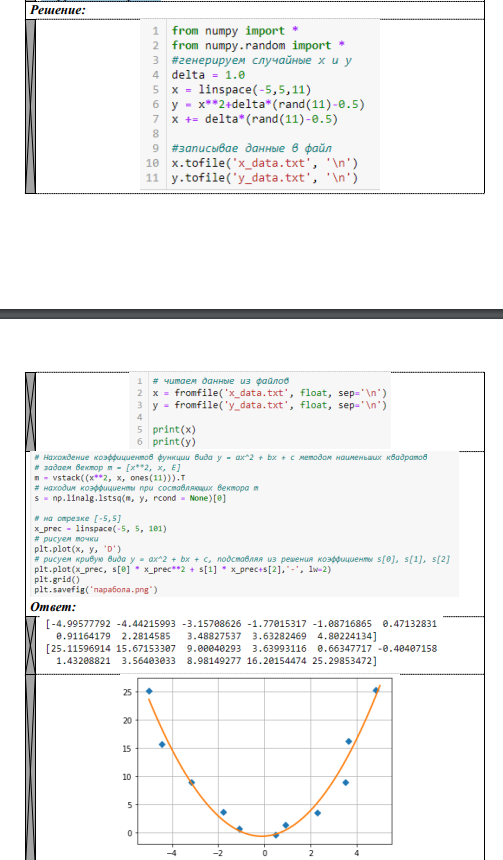

# 1.1.3 Пример
Задача:

По данным предыдущего примера постройте эстраполяционного полинома
третьего порядка

Решение:
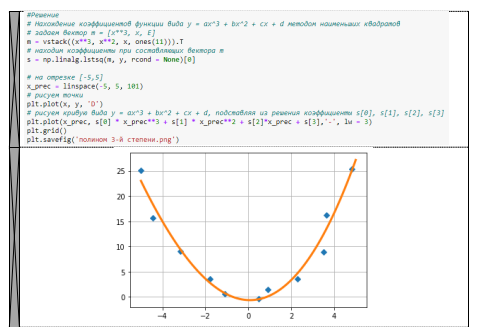

# *************************************************

# Задание
Подставьте собственные данные и поэкспериментируйте с представленными
функциями. Проанализируйте динамику изменения данных.

Матрица A: [[10.  1.]
 [-5.  1.]
 [ 6.  1.]
 [ 0.  1.]]
Используем метод lstsq для решения его относительно вектора p:
-0.08910133843212238 0.7950286806883364


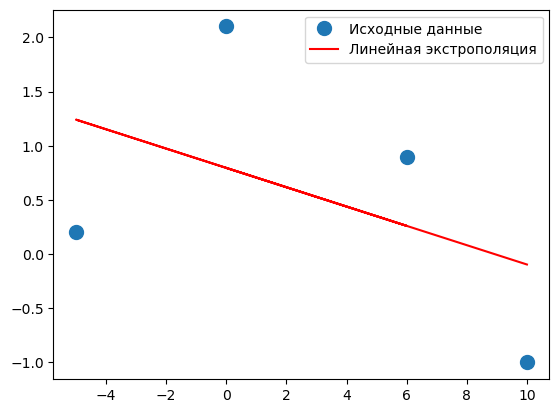

Данные из файлов:
[-4.67177878 -3.96673368 -2.75781221 -2.3921926  -1.17837339  0.40994997
  1.47144277  2.42032022  3.05135766  4.14265331  5.49799027]
[25.32341781 16.4632764   8.69035294  4.08025064  0.71671668 -0.07524947
  1.48830244  4.08262945  9.24491991 15.98943696 24.9518487 ]


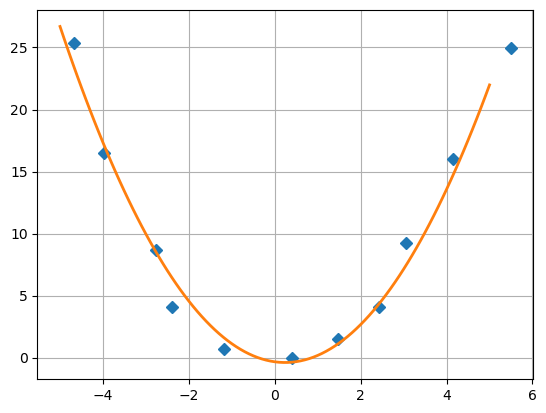

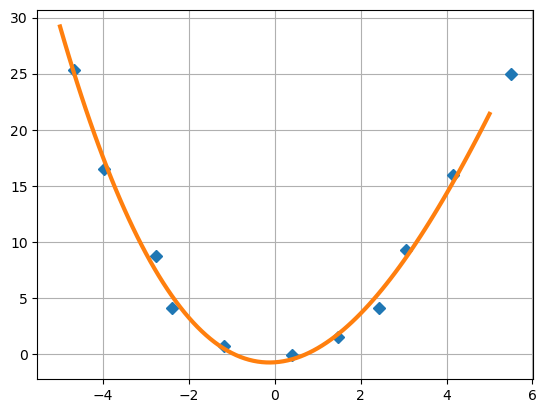

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import *
from numpy.random import *
x = np.array([10, -5, 6, 0])
y = np.array([-1, 0.2, 0.9, 2.1])

#перепишем линейное уравнение y = mx + c как y = Ap, где A = [[ x 1 ]] и p = [[m], [c]]
#построим A по x:
A = np.vstack([x, np.ones(len(x))]).T
print("Матрица A:",A)
#используем метод lstsq для решения его относительно вектора p.
print("Используем метод lstsq для решения его относительно вектора p:")
m, c = np.linalg.lstsq(A, y, rcond = None)[0]
print(m, c)
#построим график полученной прямой и укажем на нем точки
plt.plot(x, y, 'o', label='Исходные данные', markersize=10)
plt.plot(x, m*x + c, 'r', label = 'Линейная экстрополяция')
plt.legend()
plt.show()

#генерируем слуайные x и y
delta = 1.0
x = linspace(-5, 5, 11)
y = x**2 + delta*(rand(11)-0.5)
x += delta*(rand(11)-0.5)

#записываем данные в файл
x.tofile('x_data.txt', '\n')
y.tofile('y_data.txt', '\n')

#читаем данные из файлов
x = fromfile('x_data.txt', float, sep='\n')
y = fromfile('y_data.txt', float, sep='\n')
print("Данные из файлов:")
print(x)
print(y)

#нахождение коэффициентов функции вида y = ax^2 + bx + c методом наименьших квадратов
#задаем вектор m = [x**2, x, E]
m = vstack((x**2, x, ones(11))).T
#находим коэффициенты при составляющих вектора m
s = np.linalg.lstsq(m, y, rcond = None)[0]

#на отрезке [-5, 5]
x_prec = linspace(-5, 5, 101)
#рисуем точки
plt.plot(x, y, 'D')
#рисуем кривую вида y = ax^2 + bx +c, подствляя из решения коэффициенты s[0], s[1], s[2]
plt.plot(x_prec, s[0] * x_prec**2 + s[1] * x_prec+s[2], '-', lw=2)
plt.grid()
plt.savefig('парабола.png')
plt.show()

#нахождение коэффициентов функции вида y = ax^3 + bx^2 + cx + d методом наименьших квадратов
#задаем вектор m = [x**3, x, E]
m = vstack((x**3, x**2, x, ones(11))).T
#находим коэффициенты при составляющих вектора m
s = np.linalg.lstsq(m, y, rcond=None)[0]

#на отрезке [-5, 5]
x_prec = linspace(-5, 5, 101)
#рисуем точки
plt.plot(x, y, 'D')
#рисуем кривую вида y = ax^3 + bx^2 + cx + d, подставляя из решения коэффициенты s[0], s[1], s[2], s[3]
plt.plot(x_prec, s[0] * x_prec**3 + s[1] * x_prec**2 + s[2] * x_prec + s[3], '-', lw=3)
plt.grid()
plt.savefig('полинов 3-й степени.png')
plt.show()

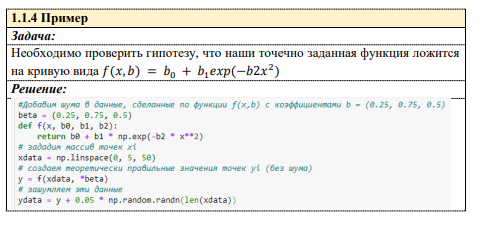
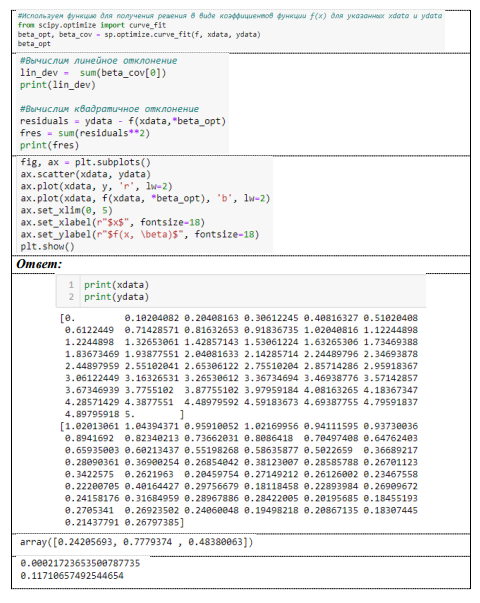
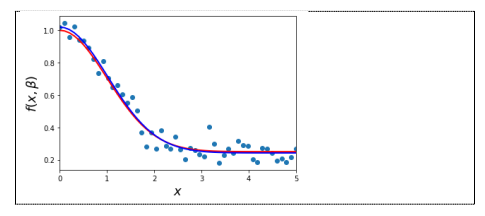

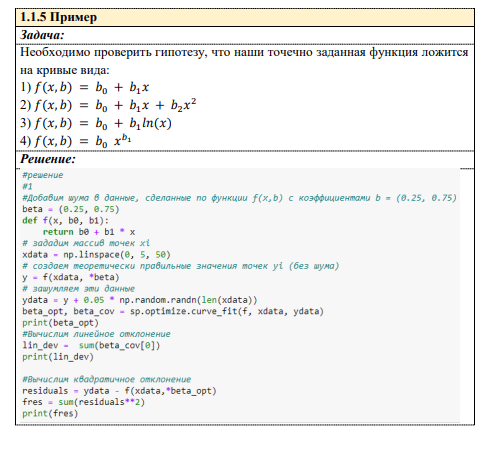
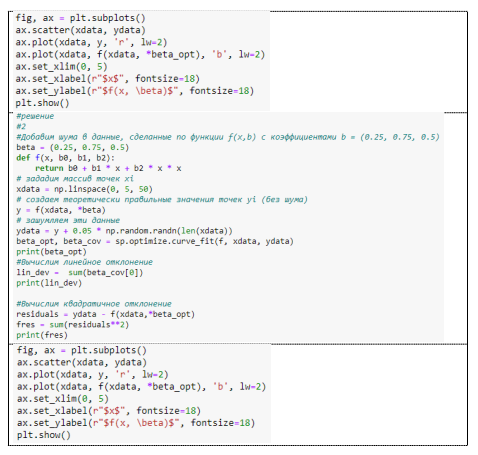
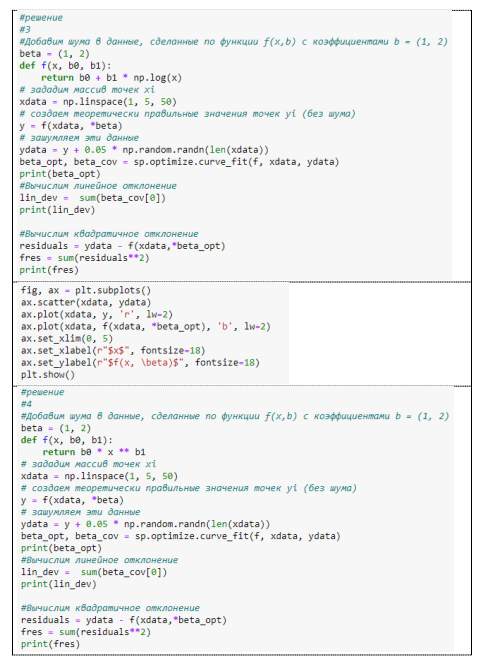
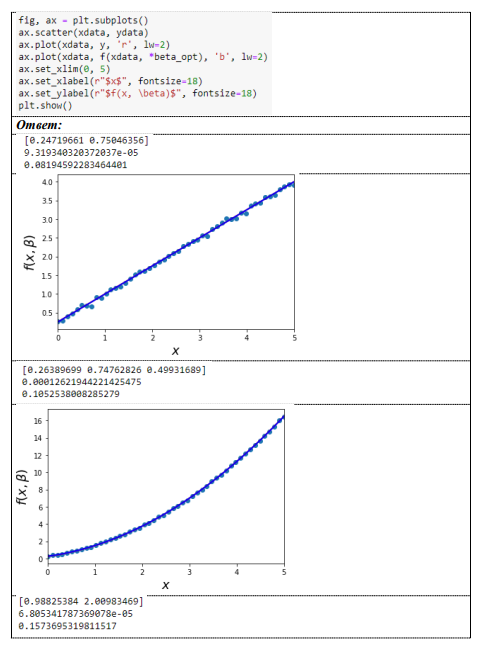
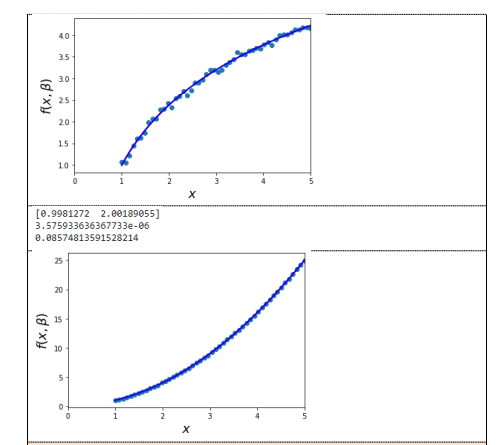

# Задание:

Подставьте собственные данные и поэкспериментируйте с представленными
функциями. Проанализируйте динамику изменения данных.
Решение:


[0.27640149 0.7500921 ]
1.2024656252494231e-05
0.01057340457694523


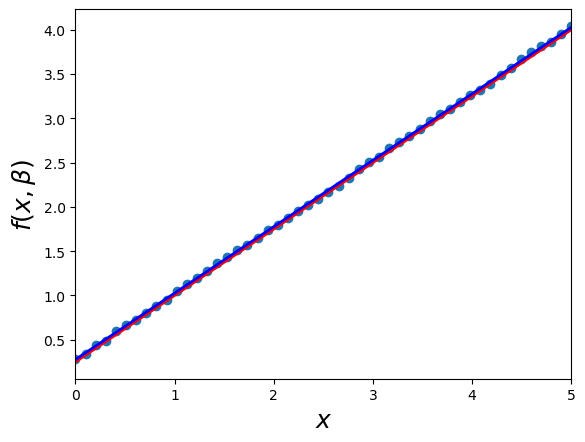

[0.22771249 0.77661453 0.49571938]
0.00012379346368908786
0.10323078694033837


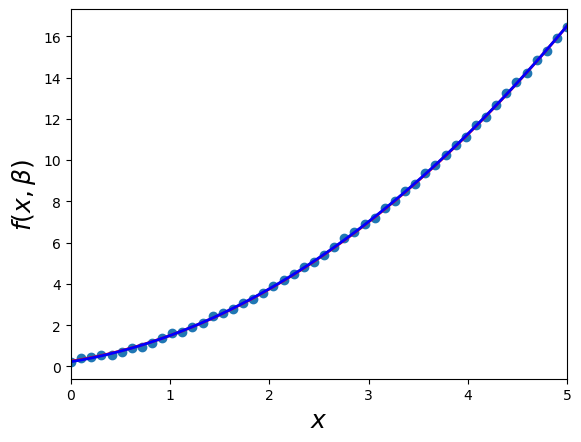

[1.04931593 1.96864999]
5.4853481464874694e-05
0.12684546589051213


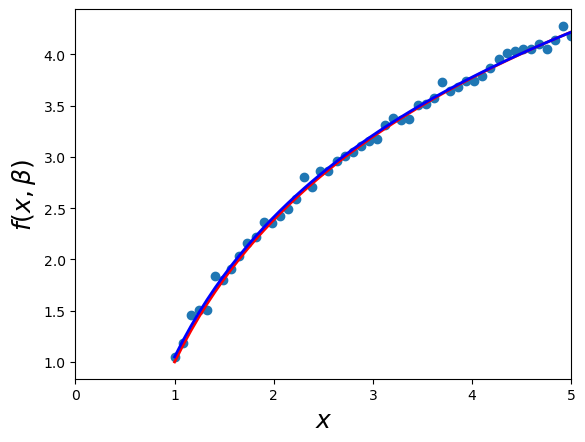

[0.99773719 2.00095122]
4.183358801604337e-06
0.10022349955364317


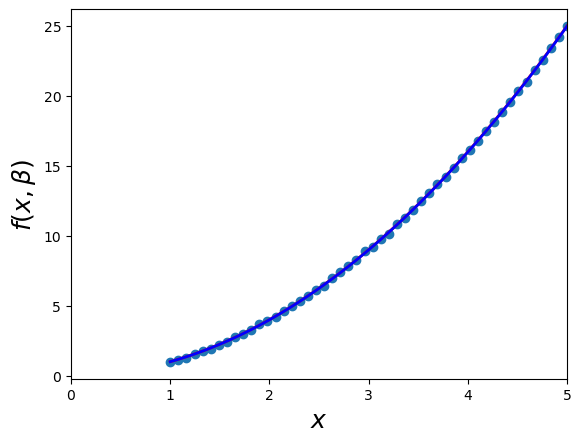

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import *
from numpy.random import *
from scipy.optimize import curve_fit
import scipy
#1
#добавить шума в данные, сделанные по функции f(x,b) с коэффициентами b = (0.25, 0.75)
beta = (0.25, 0.75)
def f(x, b0, b1):
    return b0 + b1 * x
#зададим массив точек xi
xdata = np.linspace(0, 5, 50)
#создаем теоретически правильное значение точек yi (без шума)
y = f(xdata, *beta)
#зашумляем эти данные
ydata = y + 0.05 * np.random.rand(len(xdata))
beta_opt, beta_cov = scipy.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)
#вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)

#вычислим квадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw = 2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

#2
#добавим шума в данные, сделанные по функции f(x,b) с коэффициентами b = (0.25, 0.75, 0.5)
beta = (0.25, 0.75, 0.5)
def f(x, b0, b1, b2):
    return b0 + b1 * x + b2 * x * x
#зададим массив точек xi
xdata = np.linspace(0, 5, 50)
#создаем теоретически првильные значения точек yi (без шума)
y = f(xdata, *beta)
#зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = scipy.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)
#вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)

#вычислим квадратичное отклонение
residuals = ydata - f(xdata,*beta_opt)
fres = sum(residuals**2)
print(fres)
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

#3
#добавим шума в данные, сделанные по функции f(x,b) с коэффиуиентами b = (1,2)
beta = (1,2)
def f(x, b0, b1):
    return b0 + b1 * np.log(x)
#зададим массив точек xi
xdata = np.linspace(1, 5, 50)
#создаем теоритически правильные значения точек yi (без шума)
y = f(xdata, *beta)
#зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = scipy.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)
#вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)

#вычислим квадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

#4
#добавим шума в данные, сделанные по функции f(x,b) с коэффициентами b = (1,2)
beta = (1,2)
def f(x, b0, b1):
    return b0 * x ** b1
#зададим массив точек xi
xdata = np.linspace(1, 5, 50)
#создаем теоретическая правильные значения точек yi (без шума)
y = f(xdata, *beta)
#зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = scipy.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)
#вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)

#вычислим квадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

# 1.2.1 Пример
Задача:
Построим простую линейную регрессию в Python с использованием
библиотеки scikit-learn
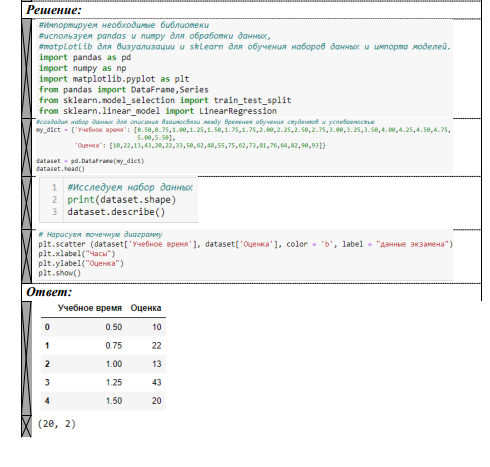
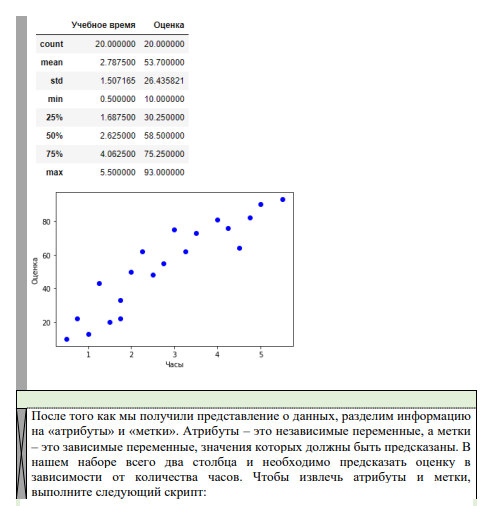
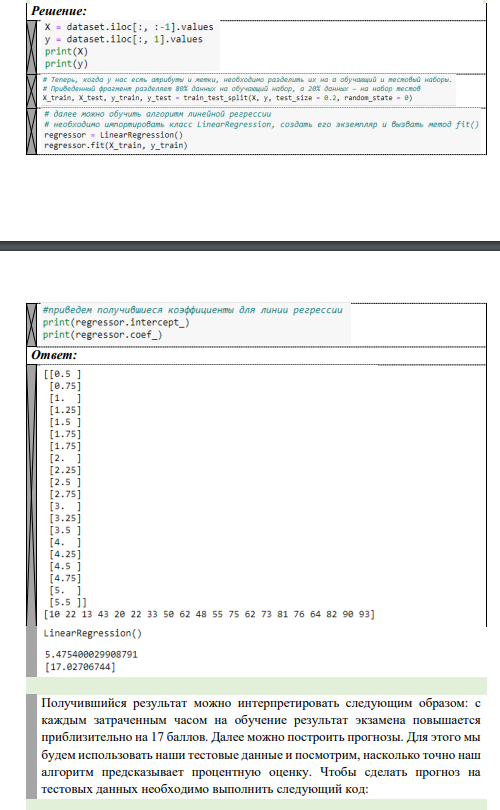
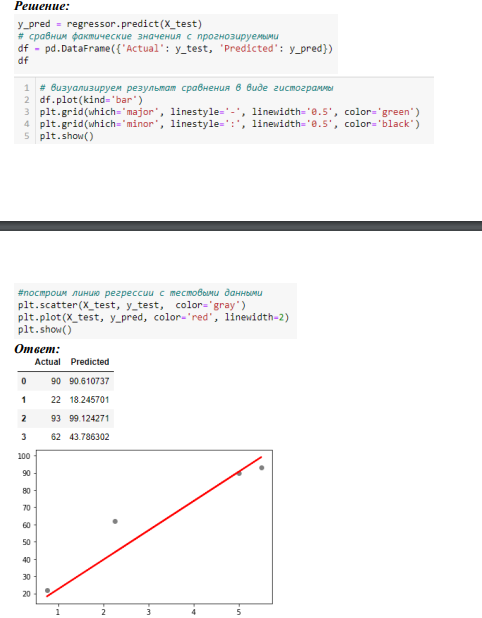

# Задание:

Постройте модель линейной регрессии для произвольных данных из двух
столбцов. Для примера можно взять точечную зависимость заработной платы от
опыта работы:
(https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linearregression/master/Salary_Data.csv).
Найдите коэффициенты линии регрессии. Постройте прогноз

(30, 2)


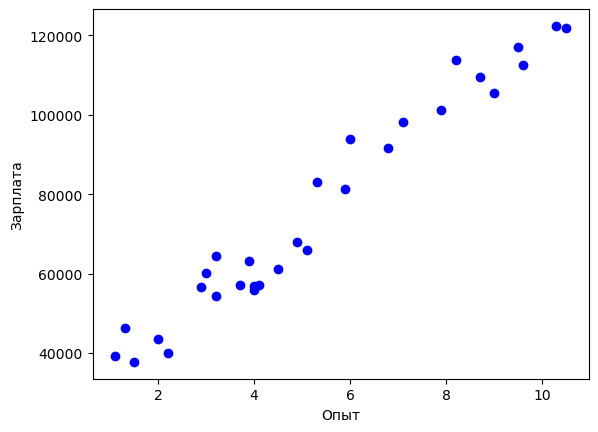

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]
[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]
26838.995893956977
[9407.35651165]


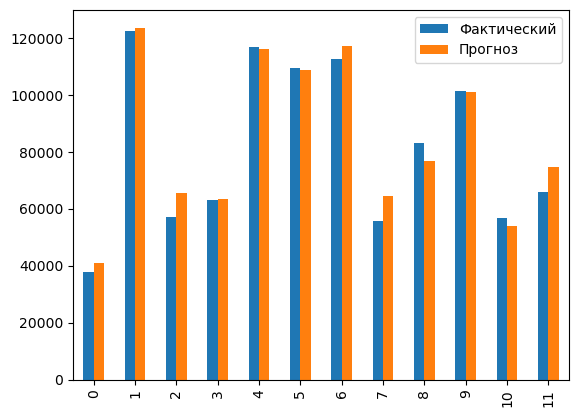

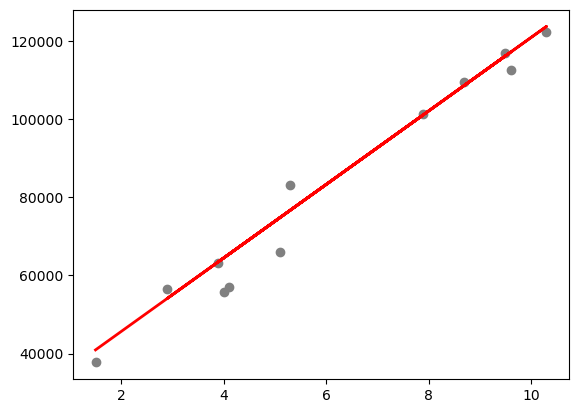

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
a = 'https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv'
dataframe = pd.read_csv(a) #читаем фрейм данных
#print(dataframe)
#Исследуем наборы данных
print(dataframe.shape)
#dataframe.describe()

plt.scatter(dataframe['YearsExperience'], dataframe['Salary'], color='b') #строим график линейной регрессии
plt.xlabel("Опыт")
plt.ylabel("Зарплата")
plt.show()

x = dataframe.iloc[:, :-1].values #создаем атрибуты и метки
y = dataframe.iloc[:, 1].values
print(x)
print(y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0) #преведенный фрагмент разделяет 60% данных на обучающий набор, а 40% данных - на набор тестов
regressor = LinearRegression() #обучаем алгоритм линейной регрессии
regressor.fit(x_train, y_train)
print(regressor.intercept_) #приводим получившиеся коэффициенты для линии регрессии
print(regressor.coef_)
y_pred = regressor.predict(x_test)
df = pd.DataFrame({'Фактический': y_test, 'Прогноз': y_pred}) #сравниваем фактичекие значения с прогнозируемыми

df.plot(kind='bar') #строим гистограмму для результатов сравнения
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(plt.grid(which='major', linestyle=':', linewidth='0.5', color='black'))
plt.show()

plt.scatter(x_test, y_test, color='grey') #строим линию регрессии с тестовыми данными
plt.plot(x_test, y_pred, color='red', linewidth=2)
plt.show()

# 1.3.1 Пример
Задача:
Для решения задачи множественной регрессии можно задействовать уже
известный метод numpy.linalg.lstsq.
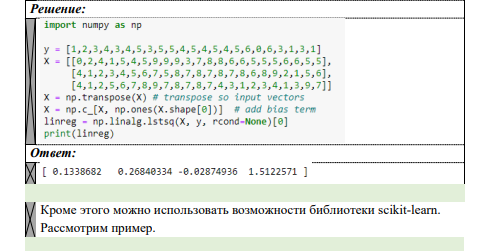

# 1.3.2 Пример
Задача:
Для данных из предыдущей задачи построить модель множественной
линейной регрессии с использованием средств библиотеки sсikit-learn.
Решение:
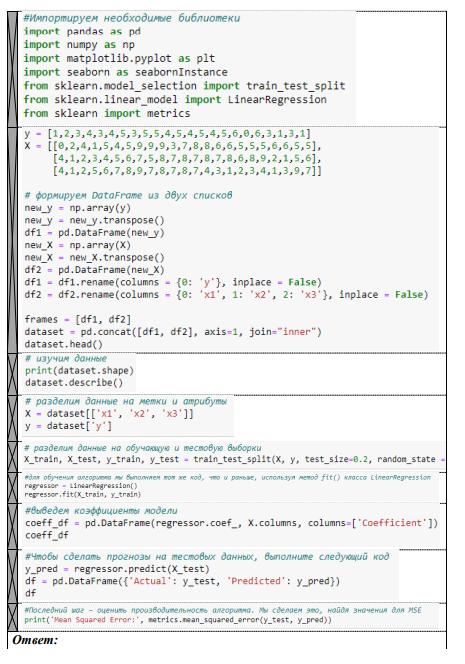
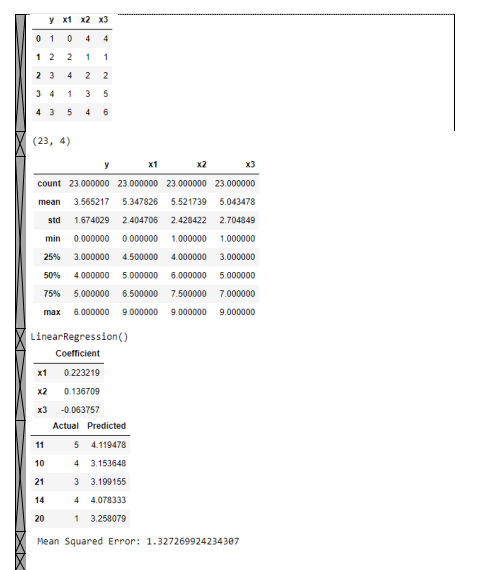

#  *******************************************************

# Задание
Постройте модель множественной линейной регрессии для произвольных
данных из нескольких столбцов. Для примера можно взять потребления
газа (в миллионах галлонов) в 48 штатах США или набор данных о
качестве красного вина (1) и (2) соответственно. Найдите коэффициенты
множественной регрессии. Постройте прогноз.
1.
https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/pe
trol_consumption.csv
2. https://raw.githubusercontent.com/aniruddhachoudhury/Red-WineQuality/master/winequality-red.csv

Petrol_tax - налог на бензин 
 Average_income - средний заработок 
 Average_income - асфальтированные дороги 
 Population_Driver_licence(%) - процент водительского удостоверения у населения 
 Petrol_Consumption - расход бензина 

    Petrol_tax  Average_income  Paved_Highways  Population_Driver_licence(%)  \
0         9.00            3571            1976                         0.525   
1         9.00            4092            1250                         0.572   
2         9.00            3865            1586                         0.580   
3         7.50            4870            2351                         0.529   
4         8.00            4399             431                         0.544   
5        10.00            5342            1333                         0.571   
6         8.00            5319           11868                         0.451   
7         8.00            5126            2138                         0.553   
8         8.00            4447            8577    

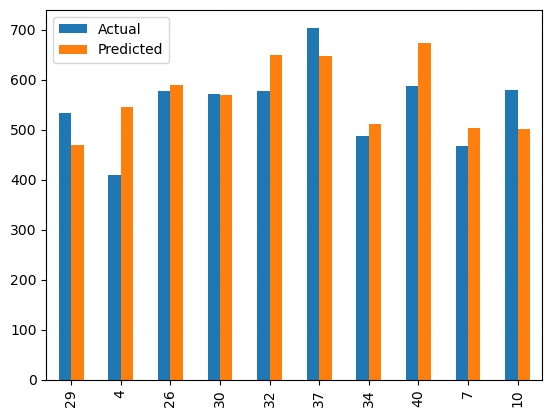

Коэффиценты множественной регрессии 0.673799082757923


D:\Anaconda\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


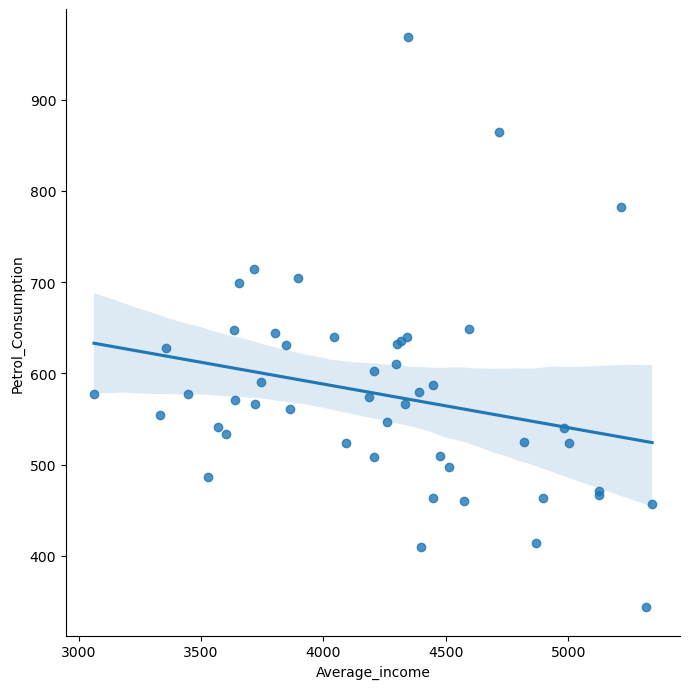

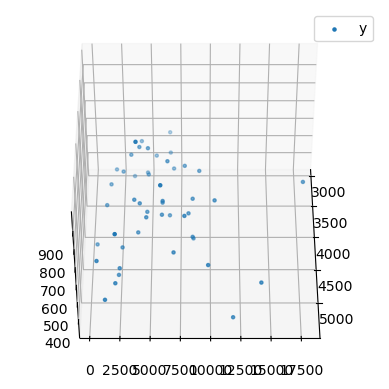

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as saebornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sns
a ='https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/petrol_consumption.csv'
data = pd.read_csv(a)
print('Petrol_tax - налог на бензин','\n','Average_income - средний заработок','\n','Average_income - асфальтированные дороги','\n','Population_Driver_licence(%) - процент водительского удостоверения у населения','\n','Petrol_Consumption - расход бензина','\n')
print(data)


print(data.shape)
x = data[['Average_income','Paved_Highways', 'Petrol_tax', 'Population_Driver_licence(%)']]
y = data['Petrol_Consumption']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


regressor = LinearRegression()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
coeff_df = pd.DataFrame(regressor.coef_, x.columns, columns=['Coefficient'])
print(coeff_df)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df)
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
df.plot(kind='bar')
plt.grid(which='major', linestyle='-', linewidth='0.01', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.01', color='black')
plt.show()

print("Коэффиценты множественной регрессии", regressor.score(x,y))

sns.lmplot(x='Average_income',y='Petrol_Consumption', data=data, size=7)


fig = plt.figure()
ax = fig.add_subplot(projection ='3d')
 
ax.scatter(data['Average_income'], data['Paved_Highways'], y, label ='y', s = 5)
ax.legend()
ax.view_init(45, 0)

plt.show()

# Задание *

Экспериментально получены N − значений величины Y при 
различных значениях величины X. Построить полиномы первой и второй 
степени, аппроксимирующие результаты эксперимента, с применением 
метода наименьших квадратов. Результаты выводятся в виде таблиц 
значений и графиков, полученных полиномов
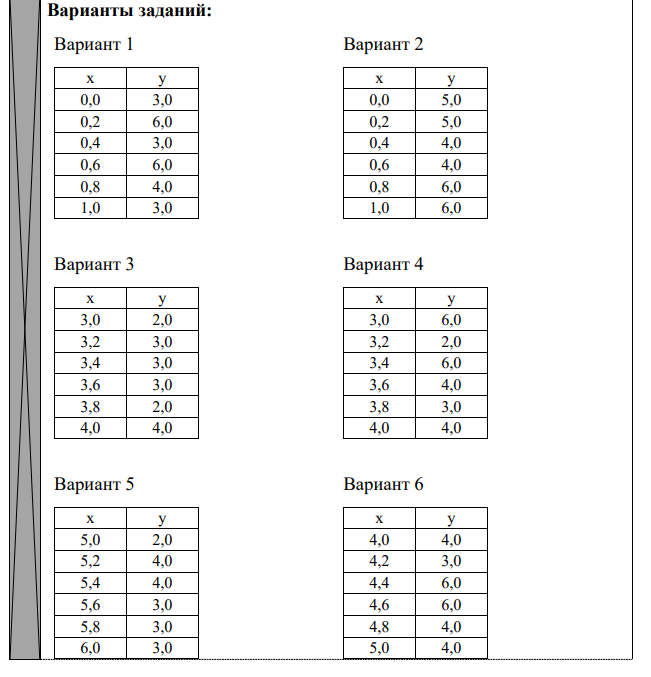
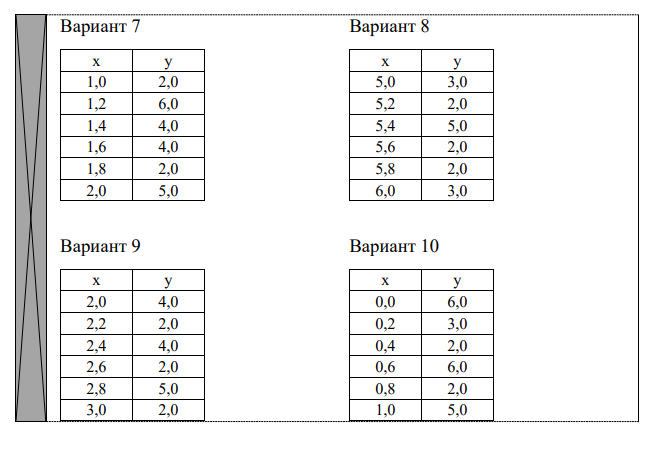


# ВАРИАНТ 7

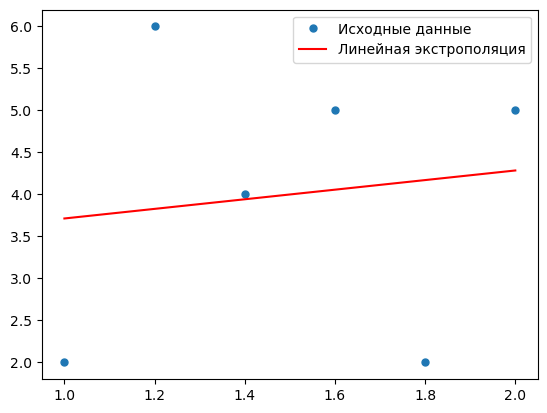

Средняя квадратичная ошибка полинома 1 - й степени:  2.295238095238095


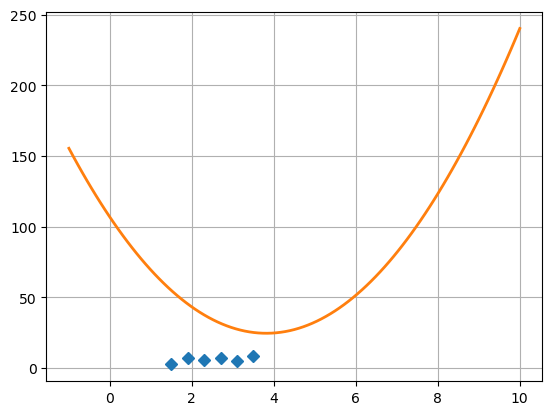

Средняя квадратичная ошибка полинома 2 - й степени:  9678.148543130263


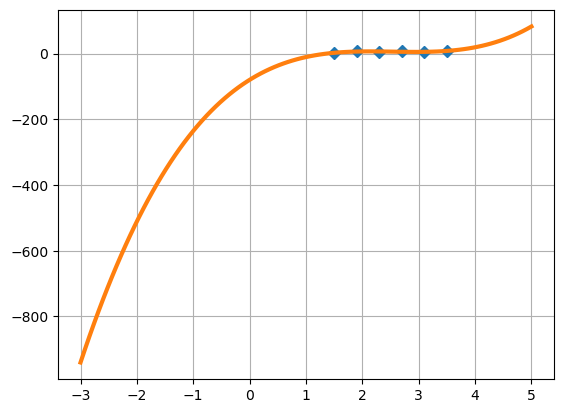

Средняя квадратичная ошибка полинома 3 - й степени:  88791.38058820678


In [20]:
#Постройте модель множественной линейной регрессии для произвольных данных из нескольких столбцов. Для примера можно взять потребления газа (в миллионах галлонов) в 48 штатах США или набор данных о качестве красного вина (1) и (2) соответственно. Найдите коэффициенты множественной регрессии. Постройте прогноз.

import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction import DictVectorizer
from pandas import DataFrame,Series
from sklearn.linear_model import LinearRegression
from numpy import *
from numpy.random import *
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
x = np.array([1.0, 1.2, 1.4, 1.6, 1.8, 2.0])
y = np.array([2.0, 6.0, 4.0, 5.0, 2.0, 5.0])

#перепишем линейное уравнение y = mx + c как y = Ap, где A = [[ x 1 ]] и p = [[m], [c]]
#построим A по x:
A = np.vstack([x, np.ones(len(x))]).T
#print(A)
#используем метод lstsq для решения его относительно вектора p.
m, c = np.linalg.lstsq(A, y, rcond = None)[0]
#print(m, c)
#построим график полученной прямой и укажем на нем точки
plt.plot(x, y, '.', label='Исходные данные', markersize=10)
plt.plot(x, m*x + c, 'r', label = 'Линейная экстрополяция')
plt.legend()
plt.show()
print('Средняя квадратичная ошибка полинома 1 - й степени: ',mean_squared_error(y, m*x + c))


delta = 1.0
x = np.array([1.0, 1.2, 1.4, 1.6, 1.8, 2.0])
y = x**2 + delta*(np.array([2.0, 6.0, 4.0, 5.0, 2.0, 5.0])-0.5)
x += delta*(np.array([1.0, 1.2, 1.4, 1.6, 1.8, 2.0])-0.5)

#записываем данные в файл
x.tofile('x_data.txt', '\n')
y.tofile('y_data.txt', '\n')

#читаем данные из файлов
x = fromfile('x_data.txt', float, sep='\n')
y = fromfile('y_data.txt', float, sep='\n')

#print(x)
#print(y)

#нахождение коэффициентов функции вида y = ax^2 + bx + c методом наименьших квадратов
#задаем вектор m = [x**2, x, E]
m = vstack((x**3, x**2, x, ones(6))).T
#находим коэффициенты при составляющих вектора m
s = np.linalg.lstsq(m, y, rcond = None)[0]

#на отрезке [-10, 15]
x_prec = linspace(-1, 10, 101)
#рисуем точки
plt.plot(x, y, 'D')
#рисуем кривую вида y = ax^2 + bx +c, подствляя из решения коэффициенты s[0], s[1], s[2]

plt.plot(x_prec, s[0] * x_prec**2 + s[1] * x_prec+s[2], '-', lw=2)
plt.grid()
plt.savefig('парабола.png')
plt.show()
print('Средняя квадратичная ошибка полинома 2 - й степени: ',mean_squared_error(x_prec, s[0] * x_prec**2 + s[1] * x_prec+s[2]))
#нахождение коэффициентов функции вида y = ax^3 + bx^2 + cx + d методом наименьших квадратов


#на отрезке [-15, 15]
x_prec = linspace(-3, 5, 101)
#рисуем точки
plt.plot(x, y, 'D')
#рисуем кривую вида y = ax^3 + bx^2 + cx + d, подставляя из решения коэффициенты s[0], s[1], s[2], s[3]
z =  s[0] * x_prec**3 + s[1] * x_prec**2 + s[2] * x_prec + s[3]
plt.plot(x_prec, s[0] * x_prec**3 + s[1] * x_prec**2 + s[2] * x_prec + s[3], '-', lw=3)
plt.grid()
plt.savefig('полинов 3-й степени.png')
plt.show()
print('Средняя квадратичная ошибка полинома 3 - й степени: ',mean_squared_error(x_prec, s[0] * x_prec**3 + s[1] * x_prec**2 + s[2] * x_prec + s[3]))
